In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('engineering colleges in India.csv')
df.head()

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,647 Acres,4811,329,2007,3.12,NaN,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.0
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215 Acres,1071,192,2007,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6666666667
2,Netaji Subhas University of Technology,Co-Ed,145 Acres,3759,101,2018,NaN,NaN,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",New Delhi,Delhi,India,Public/Government,352320.0
3,Birla Institute of Technology,Co-Ed,980 Acres,4506,284,1955,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Ranchi,Jharkhand,India,Private,596686.0465116279
4,International Institute of Information Technology,Co-Ed,66 Acres,1721,85,2001,3.05,NaN,"B.Tech Computer Science and Engineering, M.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Hyderabad,Telangana,India,Private,756666.6666666666


In [10]:
df.isnull().sum()

College Name                    0
Genders Accepted               18
Campus Size                  2751
Total Student Enrollments    1003
Total Faculty                 161
Established Year              101
Rating                       5113
University                   1936
Courses                         0
Facilities                     12
City                            0
State                           0
Country                         0
College Type                    1
Average Fees                    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   College Name               5446 non-null   object
 1   Genders Accepted           5428 non-null   object
 2   Campus Size                2695 non-null   object
 3   Total Student Enrollments  4443 non-null   object
 4   Total Faculty              5285 non-null   object
 5   Established Year           5345 non-null   object
 6   Rating                     333 non-null    object
 7   University                 3510 non-null   object
 8   Courses                    5446 non-null   object
 9   Facilities                 5434 non-null   object
 10  City                       5446 non-null   object
 11  State                      5446 non-null   object
 12  Country                    5446 non-null   object
 13  College Type               5445 non-null   object
 14  Average 

In [14]:
df.columns

Index(['College Name', 'Genders Accepted', 'Campus Size',
       'Total Student Enrollments', 'Total Faculty', 'Established Year',
       'Rating', 'University', 'Courses', 'Facilities', 'City', 'State',
       'Country', 'College Type', 'Average Fees'],
      dtype='object')

In [24]:
df["Average Fees"] = pd.to_numeric(df["Average Fees"], errors="coerce")
df["Total Faculty"] = pd.to_numeric(df["Total Faculty"], errors="coerce")
df["Established Year"] = pd.to_numeric(df["Established Year"], errors="coerce")

In [25]:
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College Name               5446 non-null   object 
 1   Genders Accepted           5428 non-null   object 
 2   Campus Size                2695 non-null   object 
 3   Total Student Enrollments  4443 non-null   object 
 4   Total Faculty              5279 non-null   float64
 5   Established Year           5339 non-null   float64
 6   Rating                     333 non-null    object 
 7   University                 3510 non-null   object 
 8   Courses                    5446 non-null   object 
 9   Facilities                 5434 non-null   object 
 10  City                       5446 non-null   object 
 11  State                      5446 non-null   object 
 12  Country                    5446 non-null   object 
 13  College Type               5445 non-null   objec

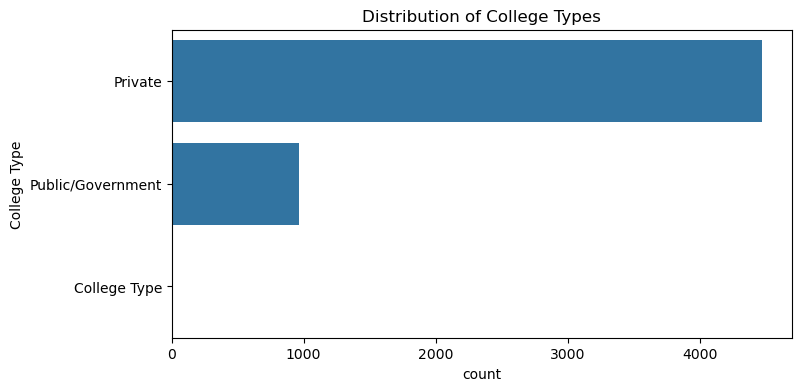

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(y=df["College Type"], order=df["College Type"].value_counts().index)
plt.title("Distribution of College Types")
plt.show()

C:\Users\Samarth Patil\AppData\Local\Temp\ipykernel_12480\297733586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["State"], order=df["State"].value_counts().head(10).index,palette="coolwarm")


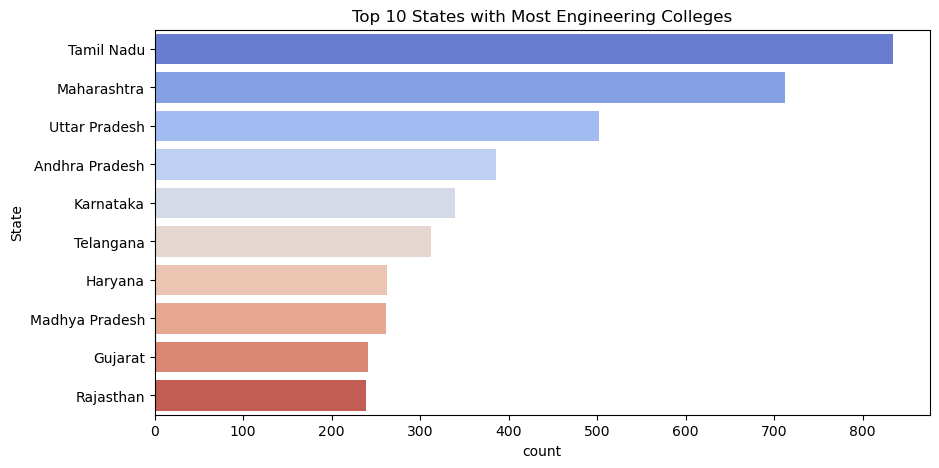

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["State"], order=df["State"].value_counts().head(10).index,palette="coolwarm")
plt.title("Top 10 States with Most Engineering Colleges")
plt.show()

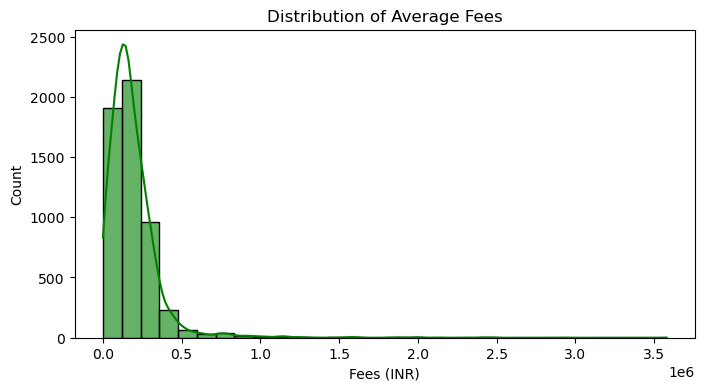

In [47]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Average Fees"].dropna(), bins=30, kde=True, color="green", alpha=0.6)
plt.title("Distribution of Average Fees")
plt.xlabel("Fees (INR)")
plt.show()

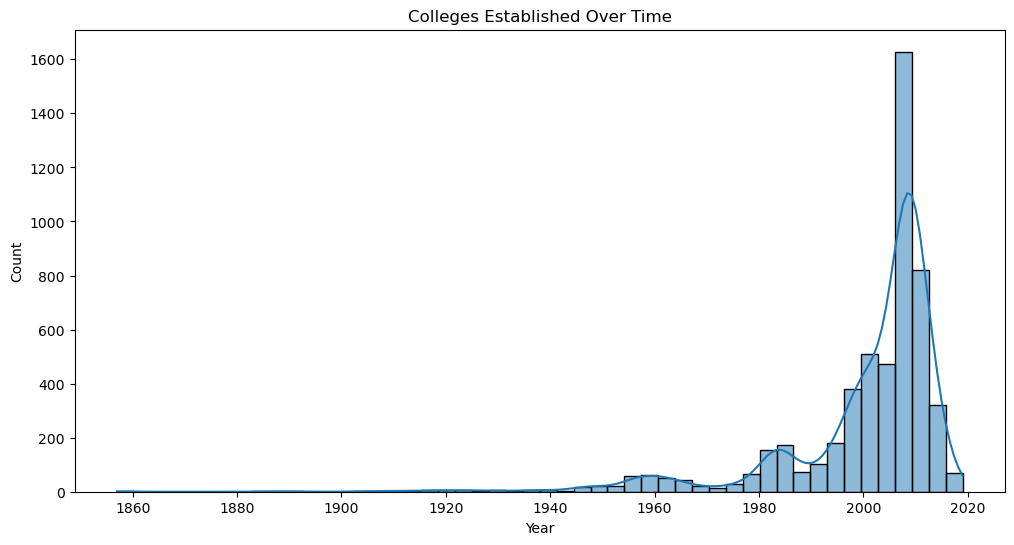

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Established Year"].dropna(), bins=50, kde=True)
plt.title("Colleges Established Over Time")
plt.xlabel("Year")
plt.show()

In [ ]:
df["Campus Size"] = df["Campus Size"].astype(str).str.replace(" Acres", "", regex=True)
df["Campus Size"] = pd.to_numeric(df["Campus Size"], errors="coerce")


In [40]:
top_campus_colleges = df.nlargest(10, "Campus Size")[["College Name", "Campus Size"]]

C:\Users\Samarth Patil\AppData\Local\Temp\ipykernel_20824\4153948680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_campus_colleges["College Name"], x=top_campus_colleges["Campus Size"], palette="mako")


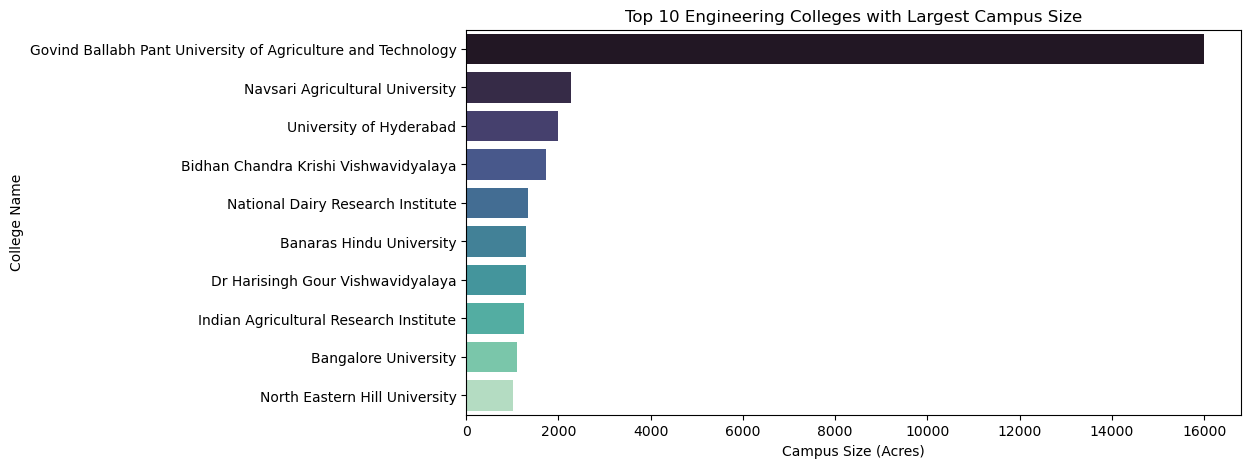

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(y=top_campus_colleges["College Name"], x=top_campus_colleges["Campus Size"], palette="mako")
plt.title("Top 10 Engineering Colleges with Largest Campus Size")
plt.xlabel("Campus Size (Acres)")
plt.ylabel("College Name")
plt.show()

In [42]:
df.columns

Index(['College Name', 'Genders Accepted', 'Campus Size',
       'Total Student Enrollments', 'Total Faculty', 'Established Year',
       'Rating', 'University', 'Courses', 'Facilities', 'City', 'State',
       'Country', 'College Type', 'Average Fees'],
      dtype='object')

C:\Users\Samarth Patil\AppData\Local\Temp\ipykernel_20824\1112656610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_colleges["College Name"], x=top_colleges["Total Student Enrollments"], palette="coolwarm")


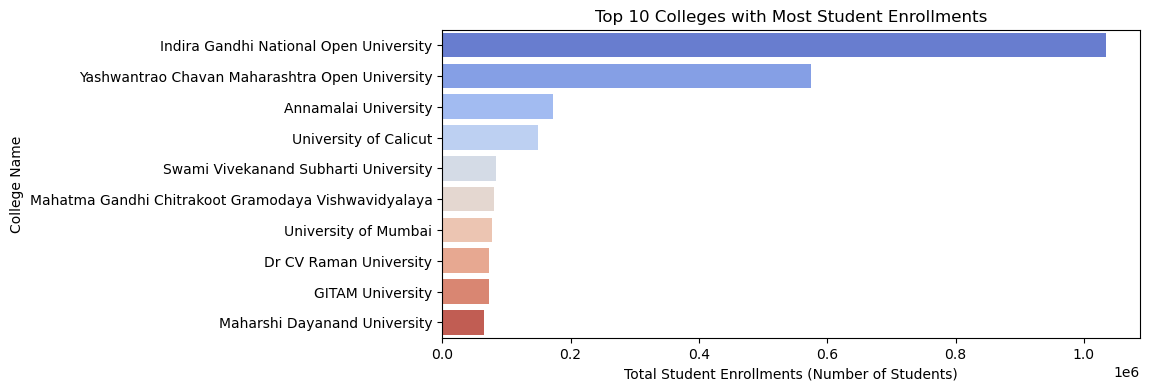

In [ ]:
df["Total Student Enrollments"] = pd.to_numeric(df["Total Student Enrollments"], errors="coerce")

top_colleges = df.nlargest(10, "Total Student Enrollments")[["College Name", "Total Student Enrollments"]]

plt.figure(figsize=(9, 4))
sns.barplot(y=top_colleges["College Name"], x=top_colleges["Total Student Enrollments"], palette="coolwarm")
plt.title("Top 10 Colleges with Most Student Enrollments")
plt.xlabel("Total Student Enrollments (Number of Students)")
plt.ylabel("College Name")
plt.show()


In [2]:
pip install python-pptx

In [3]:
pip install matplotlib seaborn